In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score


In [4]:
df=pd.read_csv("WFH_WFO_dataset - WFH_WFO_dataset.csv")

In [6]:
df.head(5)

,ID,Name,Age,Occupation,Gender,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,calmer_stressed,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target
0,1,Bhavana,45,Tutor,Female,Yes,Yes,Yes,Yes,Yes,CALMER,5,1,5,Yes,5,5,Yes,1
1,2,Harry,24,Tutor,Male,No,No,No,No,No,CALMER,2,2,2,No,3,3,No,1
2,3,Banditaa,53,HR,Female,Yes,Yes,Yes,Yes,Yes,CALMER,3,3,4,No,5,3,No,1
3,4,Neetha,26,Engineer,Female,Yes,No,Yes,Yes,No,STRESSED,3,4,4,No,4,5,Yes,0
4,5,Ram,26,Recruiter,Male,Yes,No,No,Yes,No,STRESSED,3,3,5,Yes,4,2,Yes,1


In [8]:
df.tail(5)

,ID,Name,Age,Occupation,Gender,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,calmer_stressed,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target
202,203,Nandini,32,Engineer,Female,Yes,Yes,Yes,Yes,Yes,CALMER,4,1,5,Yes,3,3,Not sure,1
203,204,Matt,52,Business,Male,Yes,Yes,Yes,Yes,Yes,CALMER,4,4,4,Yes,5,3,No,1
204,205,Rithik,22,Marketing,Male,Yes,No,Yes,Yes,No,STRESSED,4,4,4,No,4,3,Not sure,0
205,206,Radha,25,Marketing,Female,No,Yes,Yes,No,No,STRESSED,5,3,5,Yes,1,3,No,0
206,207,Anaisha,23,Tutor,Female,No,No,Yes,Yes,Yes,CALMER,3,3,4,No,2,3,No,0


In [10]:
df.shape

(207, 19)

In [12]:
df.describe()

,ID,Age,RM_professional_growth,RM_lazy,RM_productive,RM_better_work_life_balance,RM_improved_skillset,Target
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,104.000000,29.666667,3.086957,3.101449,3.623188,3.043478,3.521739,0.405797
std,59.899917,8.506993,1.089301,1.255801,0.996617,1.247539,1.004002,0.492236
min,1.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,52.500000,25.000000,2.000000,2.000000,3.000000,2.000000,3.000000,0.000000
50%,104.000000,26.000000,3.000000,3.000000,4.000000,3.000000,3.000000,0.000000
75%,155.500000,29.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,207.000000,57.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           207 non-null    int64 
 1   Name                         207 non-null    object
 2   Age                          207 non-null    int64 
 3   Occupation                   207 non-null    object
 4   Gender                       207 non-null    object
 5   Same_ofiice_home_location    207 non-null    object
 6   kids                         207 non-null    object
 7   RM_save_money                207 non-null    object
 8   RM_quality_time              207 non-null    object
 9   RM_better_sleep              207 non-null    object
 10  calmer_stressed              207 non-null    object
 11  RM_professional_growth       207 non-null    int64 
 12  RM_lazy                      207 non-null    int64 
 13  RM_productive                207 no

In [16]:
df.dtypes

ID                              int64
Name                           object
Age                             int64
Occupation                     object
Gender                         object
Same_ofiice_home_location      object
kids                           object
RM_save_money                  object
RM_quality_time                object
RM_better_sleep                object
calmer_stressed                object
RM_professional_growth          int64
RM_lazy                         int64
RM_productive                   int64
digital_connect_sufficient     object
RM_better_work_life_balance     int64
RM_improved_skillset            int64
RM_job_opportunities           object
Target                          int64
dtype: object

In [18]:
missing = df.isnull().sum()

missing[missing > 0].sort_values(ascending=False).head()

Series([], dtype: int64)

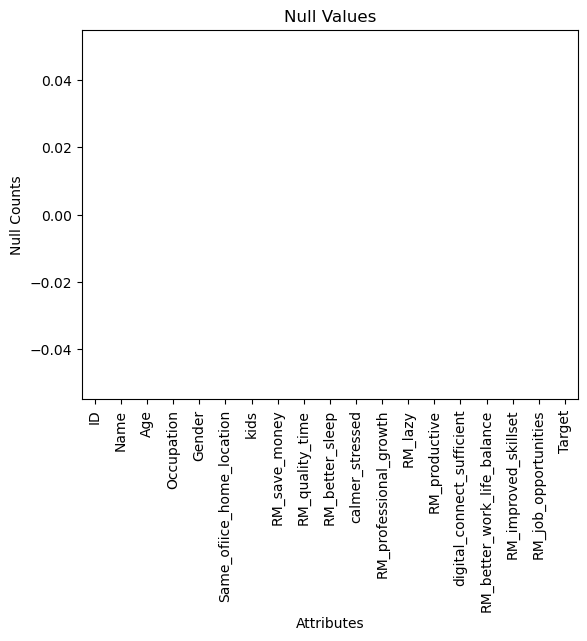

In [20]:
df.isnull().sum().plot(kind='bar')
plt.title("Null Values")
plt.xlabel("Attributes")
plt.ylabel("Null Counts")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_736\1107040747.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target', data=df, palette='viridis')


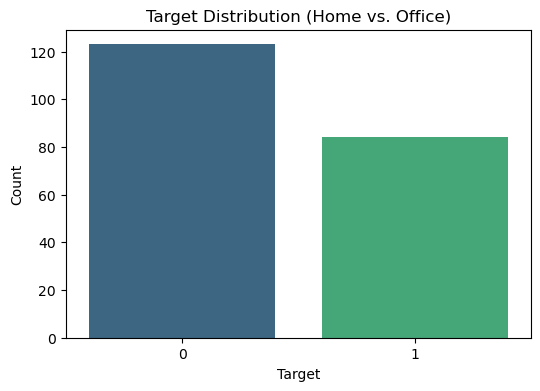

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(x='Target', data=df, palette='viridis')
plt.title('Target Distribution (Home vs. Office)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


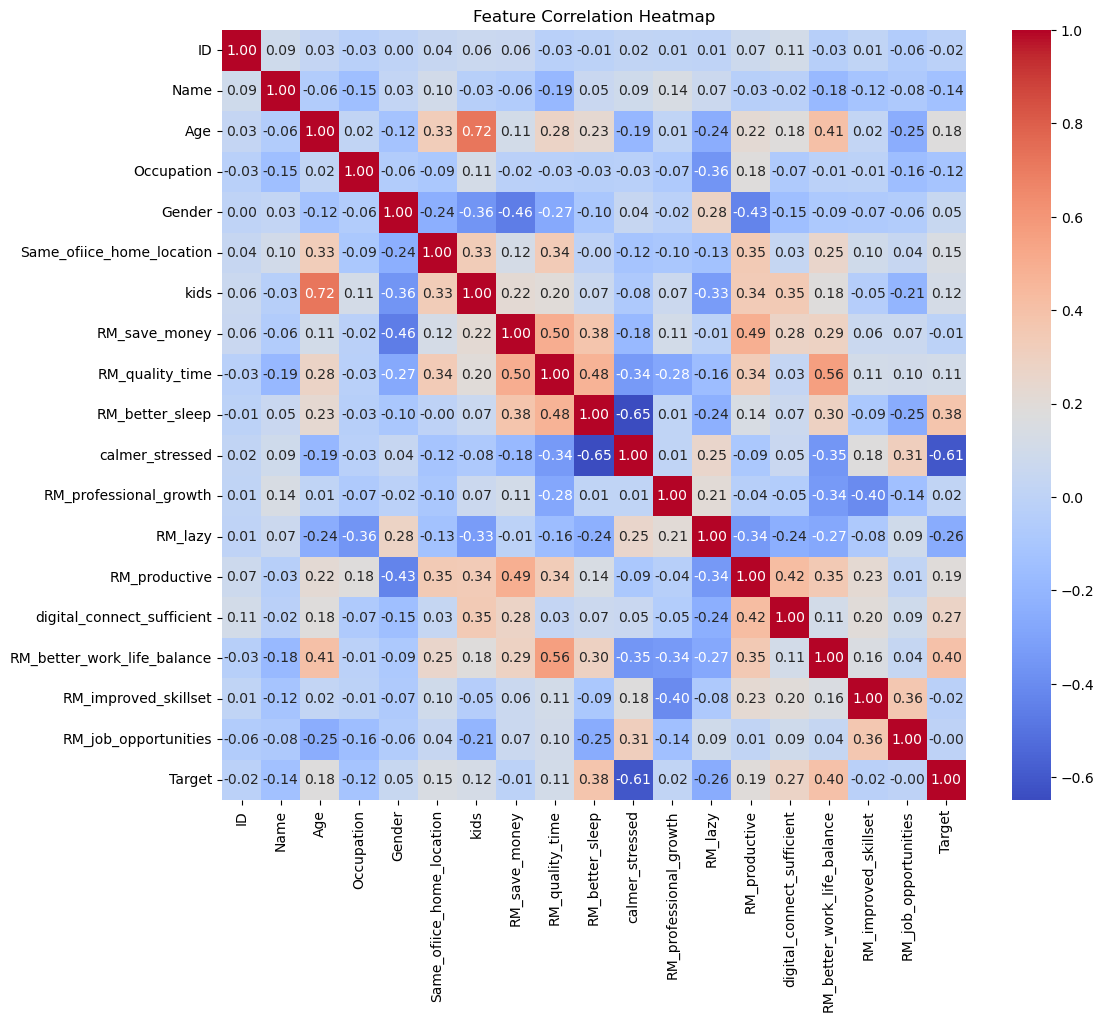

In [30]:
for col in df.select_dtypes(include=['object']).columns:
    if col != 'ID':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])


plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [32]:
# Drop unnecessary columns
df_cleaned = df.drop(columns=["ID", "Name"])

# Encode categorical variables
label_encoders = {}
for col in df_cleaned.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

In [36]:

# Separate features and target variable
X = df_cleaned.drop(columns=["Target"])
y = df_cleaned["Target"]

In [38]:
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True)
}

In [42]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "ROC-AUC Score": roc_auc_score(y_test, y_prob),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

results

{'Logistic Regression': {'Accuracy': 0.9523809523809523,
  'Precision': 0.8947368421052632,
  'Recall': 1.0,
  'F1-score': 0.9444444444444444,
  'ROC-AUC Score': 0.9811764705882353,
  'Confusion Matrix': array([[23,  2],
         [ 0, 17]], dtype=int64)},
 'Random Forest': {'Accuracy': 1.0,
  'Precision': 1.0,
  'Recall': 1.0,
  'F1-score': 1.0,
  'ROC-AUC Score': 1.0,
  'Confusion Matrix': array([[25,  0],
         [ 0, 17]], dtype=int64)},
 'Support Vector Machine': {'Accuracy': 0.9761904761904762,
  'Precision': 0.9444444444444444,
  'Recall': 1.0,
  'F1-score': 0.9714285714285714,
  'ROC-AUC Score': 1.0,
  'Confusion Matrix': array([[24,  1],
         [ 0, 17]], dtype=int64)}}

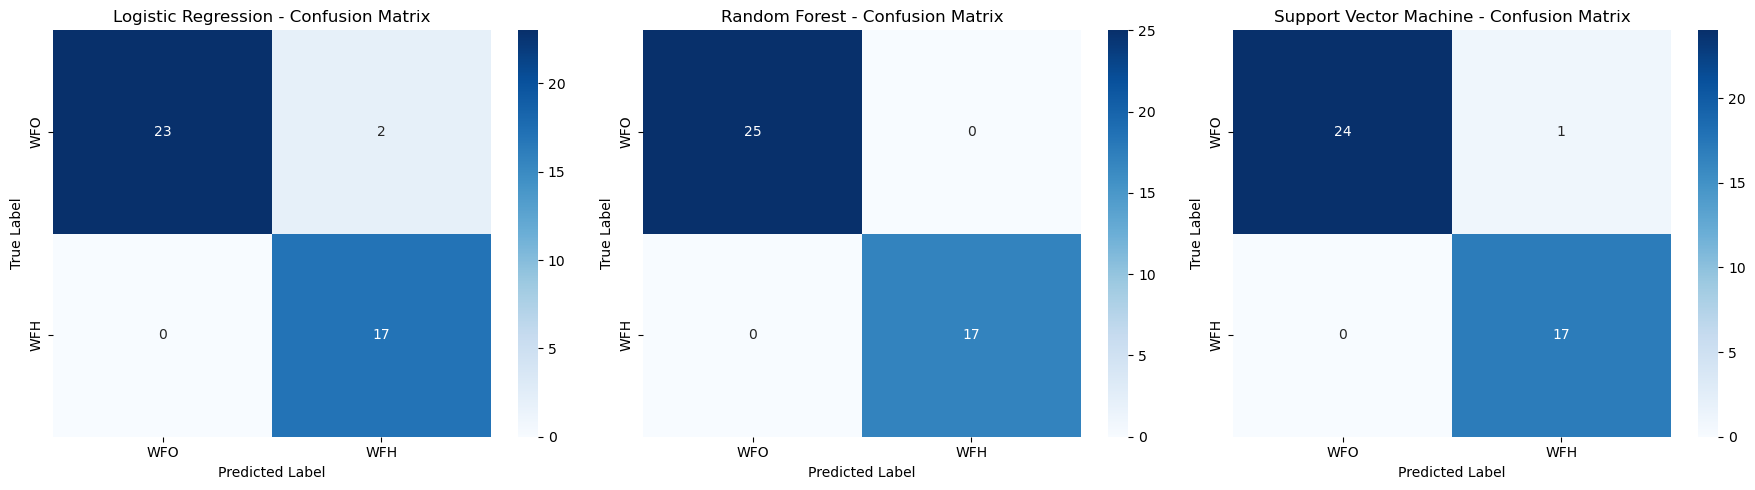

In [46]:


# Create a figure for heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Generate heatmaps for each model's confusion matrix
for ax, (name, result) in zip(axes, results.items()):
    cm = result["Confusion Matrix"]
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["WFO", "WFH"], yticklabels=["WFO", "WFH"], ax=ax)
    ax.set_title(f"{name} - Confusion Matrix")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

# Show the heatmaps
plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_736\943487359.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


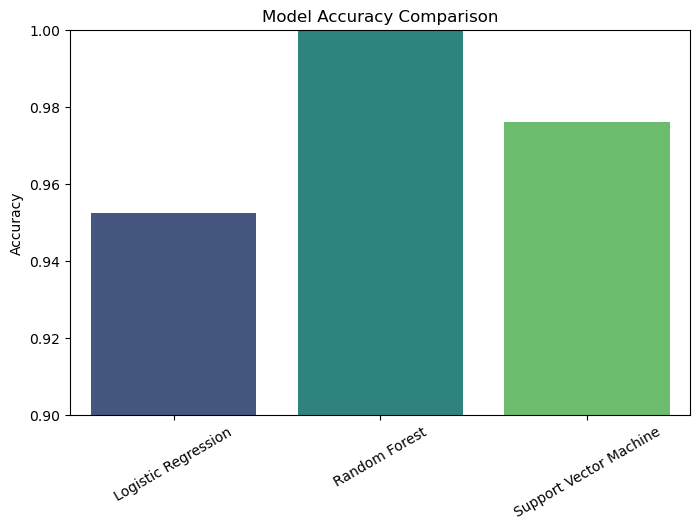

In [48]:
# Extracting model names and their accuracy scores
model_names = list(results.keys())
accuracies = [results[model]["Accuracy"] for model in model_names]

# Create a bar chart for accuracy comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.ylim(0.9, 1.0)  # Set limit to better visualize differences
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=30)
plt.show()
